## House Price Prediction

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDB     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS '}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDB'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

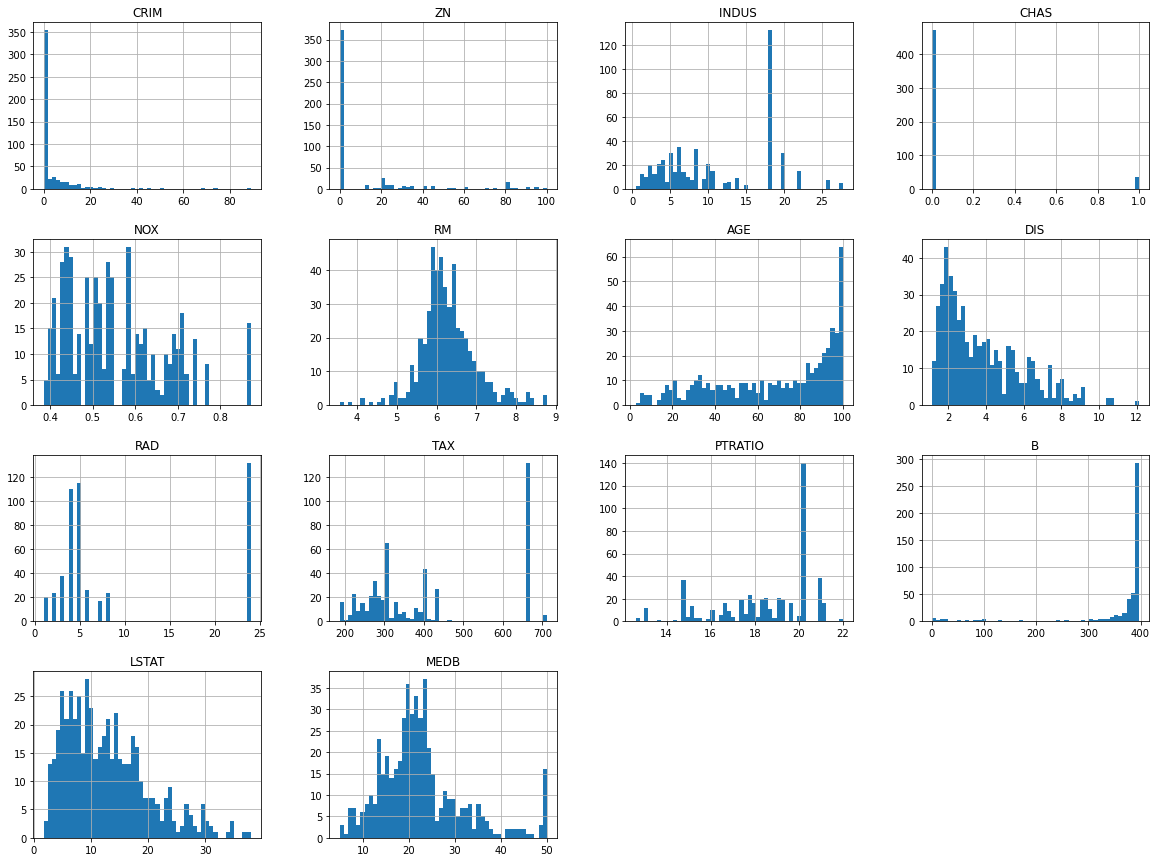

In [9]:
housing.hist(bins=50,figsize=(20,15))

## Splitting Train and Test data

import numpy as np   
def split_train_test(data,test_ratio):      
    np.random.seed(42)  ---->>  split data same auxa. No change in data.      
   shuffled=np.random.permutation(len(data))       
   test_set_size=int(len(data)*test_ratio)        
    test_indices=shuffled[:test_set_size]       
    train_indices=shuffled[test_set_size:]    
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set=split_train_test(housing,0.2)

print(f"Rows in train set:{len(train_set)}\n Rows in test set :{len(test_set)}\n)

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(housing,test_size=0.2,random_state=42)

      

In [14]:
train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.630947,10.549020,11.737745,0.058824,0.547609,6.160833,68.648039,3.742949,10.313725,424.892157,18.999020,358.241275,13.428235,21.488235
std,7.459607,24.083242,6.722576,0.236456,0.108602,0.663825,28.890866,2.010749,9.161889,177.462472,1.800577,90.641872,7.244601,8.605804
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.561000,6.200000,1.169100,1.000000,188.000000,13.000000,6.680000,2.880000,5.000000
25%,0.087368,0.000000,6.102500,0.000000,0.448250,5.870250,43.800000,2.263950,4.000000,281.750000,18.400000,375.020000,7.687500,17.125000
50%,0.209885,0.000000,10.590000,0.000000,0.532000,6.170500,74.700000,3.353400,5.000000,345.000000,19.200000,392.205000,12.335000,20.150000
75%,4.522473,0.000000,18.100000,0.000000,0.621500,6.479250,95.225000,4.764825,24.000000,666.000000,20.200000,396.900000,18.017500,24.075000
max,45.746100,95.000000,27.740000,1.000000,0.871000,8.034000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


## Stratified Sampling

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [18]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDB
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [21]:
95/7

13.571428571428571

In [22]:
376/28

13.428571428571429

## Finding Correlation  
Auta features(column) badau da arko badxa ki nai check garni 

In [ ]:
corr_matrix